# Linear Regression - Project Exercise

___
Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells prescription glasses online. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
customers = pd.read_csv("Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,johnsonsandra@hotmail.com,"4371 Cooper Springs Suite 945\nBowenbury, FM 2...",AntiqueWhite,34.246398,11.032584,38.066161,2.529217,470.443688
1,randall15@campbell-russell.com,"PSC 7326, Box 3327\nAPO AP 12916",LightGreen,32.631982,11.274920,36.665957,3.813916,476.606898
2,ochavez@roth-taylor.net,"105 Eric Expressway Apt. 335\nWest Robert, DE ...",FloralWhite,35.296694,11.745810,39.238661,4.191325,694.693310
3,stevenhanson@collins.org,"1361 Miranda Drive\nEast Timothy, WI 99337-8734",Yellow,33.080587,10.808866,36.907076,4.220104,513.805463
4,adamreynolds@robinson.biz,"61194 Ward Flats Suite 629\nWest Belinda, DE 9...",HoneyDew,33.821842,12.989061,35.241690,3.927034,426.707521


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.028146,12.016448,37.067521,3.607300,505.597086
std,1.019006,0.986040,0.983779,1.013928,107.495901
min,29.478807,8.815688,33.883261,0.152006,184.179150
25%,32.313311,11.287922,36.400440,2.929032,437.506926
50%,33.019479,12.041474,37.052260,3.629528,506.808396
75%,33.701334,12.731358,37.667047,4.299976,575.192865
max,36.139514,14.499365,39.739165,6.706218,813.427558


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [7]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

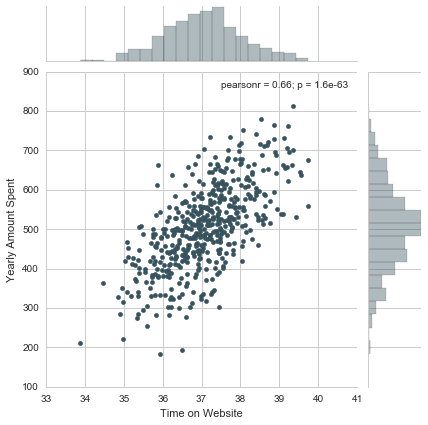

In [8]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

** Do the same but with the Time on App column instead. **

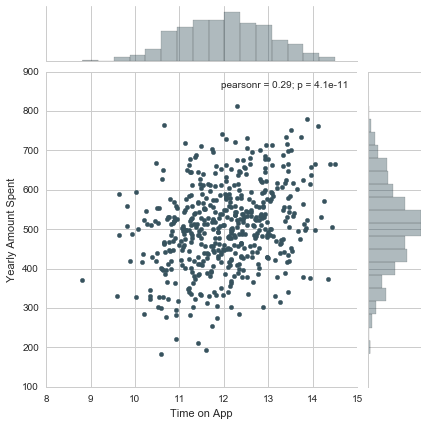

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

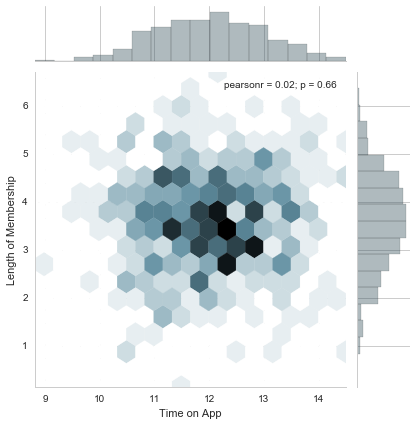

In [10]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

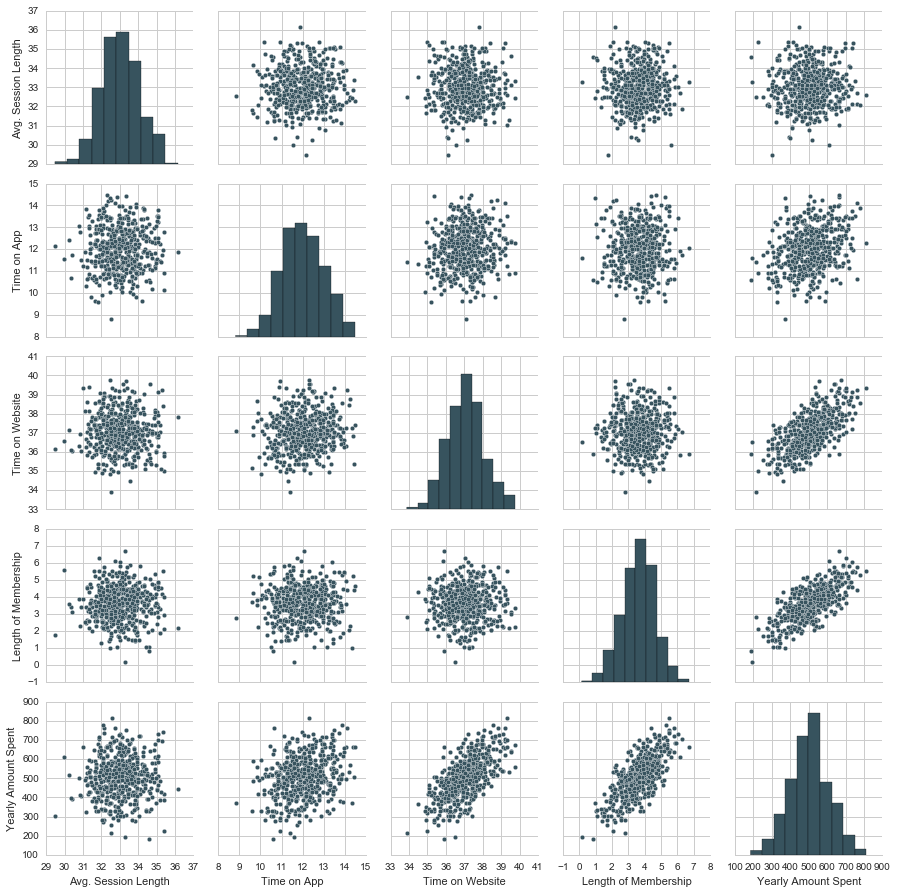

In [12]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [13]:
# Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership**

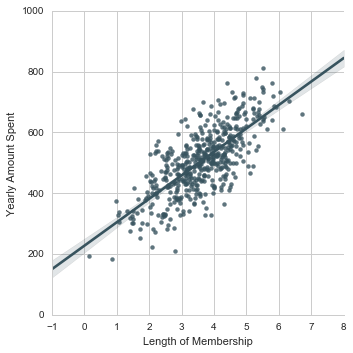

In [15]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [18]:
y = customers['Yearly Amount Spent']

In [20]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use cross_validation.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [22]:
from sklearn.cross_validation import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [25]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [26]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [27]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [33]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  0.50489545  22.75555719  68.89828723  76.23224641]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use

In [ ]:

# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))
